### Linear 모델의 최소제곱법, 경사하강법

#### 최소제곱법(Ordinary Least Squares)

In [ ]:
# 회귀 - 종속변수가 연속형 데이터일 때
# 학습용 데이터셋의 종속변수에 없던 값이 예측 값으로 나올 수 있는 상태
# 키, 몸무게 -> BMI 식
# 엄마키, 아빠키 -> 아들키

# LinearRegression (회귀)
# LogisticRegression (분류)
# KNeighborsClassifier(분류), KNeighborsRegressor (회귀)
DecisionTreeClassifier, DecisionTreeRegressor
RandomForestClassifier, RandomForestRegressor

In [ ]:
# 선형 모델 (회귀- LinearRegression, Ridge, Lasso, ..., 분류 - LogisticRegression )

# 아들키 = a1 * 엄마키 + a2 * 아빠키 + b
# 선형 회귀모델의 목표!  feature별 기울기, 절편을 구하는 것

In [ ]:
# y1 = a*x1 + b

In [1]:
import numpy as np
# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30, 40])

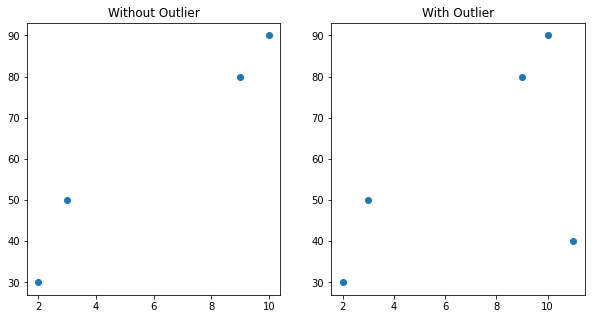

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [3]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean()) ** 2)
    b = y.mean() - w * x.mean()
    return w, b

In [4]:
w1, b1 = OLS(x1, y1)
w1, b1    # (array([6.6]), 22.899999999999977)

(6.6, 22.900000000000006)

In [5]:
w2, b2 = OLS(x2, y2)
w2, b2    # array([3.42857143]), 33.99999999999999

(3.4285714285714284, 34.0)

In [6]:
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

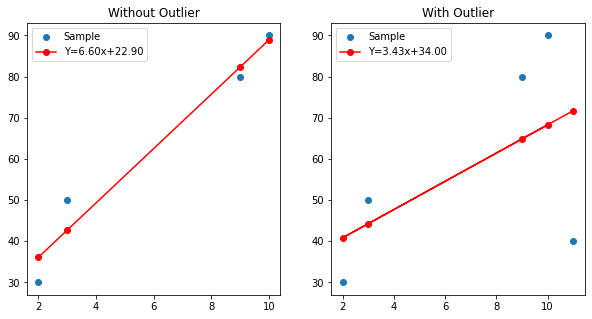

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', marker='o', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', marker='o', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.legend()
plt.title('With Outlier')
plt.show()

In [8]:
# sciket - Learn 사용
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
model1.coef_, model1.intercept_

(array([6.6]), 22.899999999999977)

In [9]:
# sciket - Learn 사용
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

#### 2. 경사하강법

선형회귀분석의 가정(R)
- https://kkokkilkon.tistory.com/175
- 독립변수, 종속변수가 선형성, 독립변수끼리 독립성

잔차분석(Python)
- https://ysyblog.tistory.com/120
- 잔차가 독립성, 등분산성, 정규성, 무상관성

In [10]:
# np.random.randn -> 가우시안 표준 정규 분포 (평균=0, 분산=1)
# 
import numpy as np

np.random.seed(1234)
a = np.random.randn(50)
a.mean(), a.std()

(0.0745711438483351, 0.9631507337917292)

In [ ]:
# Y = 2X + Residual

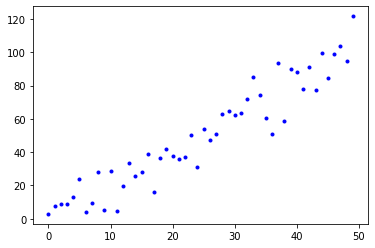

In [13]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')
plt.show()

In [ ]:
# w = 2 를 찾고싶다!

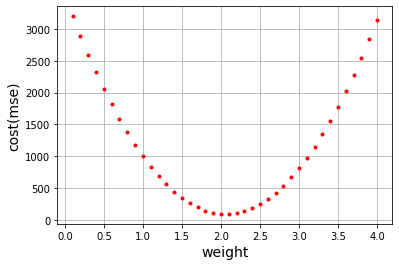

In [ ]:
w_range = np.arange(0.1, 4.1, 0.1)


costs = []  # mse 값 (오차)
for w in w_range:
    h = w * X   # 예측값
    cost = 1 / 50 * np.sum((h-Y) ** 2) # 오차제곱의 평균  (mse)
    costs.append(cost)
plt.plot(w_range, costs, 'r.')
plt.xlabel('weight', fontsize=14)
plt.ylabel('cost(mse)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
len(w_range), w_range[20]
w1 = w_range[:20]
c1 = costs[:20] 

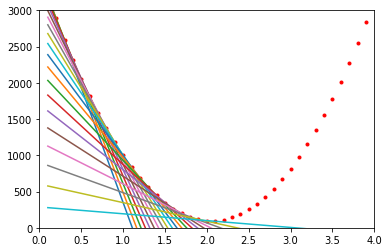

In [ ]:
plt.plot(w_range, costs, 'r.')
for w, cost in zip(w1, c1):
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X )
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
plt.show()

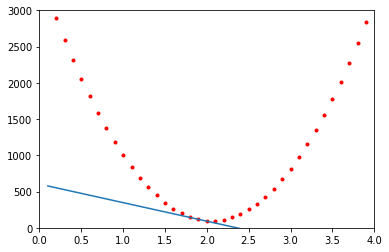

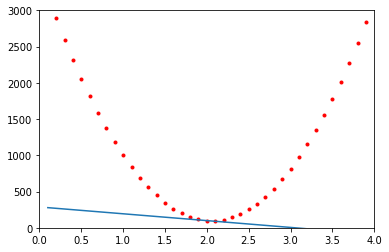

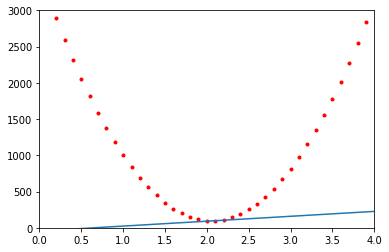

In [ ]:
for w, cost in zip(w_range[18:21], costs[18:21]):
    plt.plot(w_range, costs, 'r.')
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X )
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
    plt.show()

In [ ]:
# w = random수로 시작
# w_new = w_old - cost의 미분값 * learning_rate  # 반복동작

In [ ]:
lr = 0.01
# cost함수의 미분값이 크면 빠르게/크게 이동, cost함수의 미분값이 작으면 느리게/작게 이동
4 * lr, 2 * lr, 1 * lr, 0.5 * lr  

(0.04, 0.02, 0.01, 0.005)

In [ ]:
과대적합
- error가 작다!

- cost의 미분값(기울기)가 0인 곳을 만나면 종료, 그때의 w가 답
- max_iter : int, default=1000 - 반복을 최대 몇 번 할 것인가? 기울기가 0인 지점을 못만나더라도 1000번 반복 후에는 종료
- learning rate : w를 변경할 때 얼마나 할 것인가?
- tol : float, default=1e-3(=0.001), tol값보다 더 작은 기울기가 나오면 종료 (early_stopping parameter)
- overfitting의 경우 tol값을 크게해서 학습을 빠르게 종료하도록 함


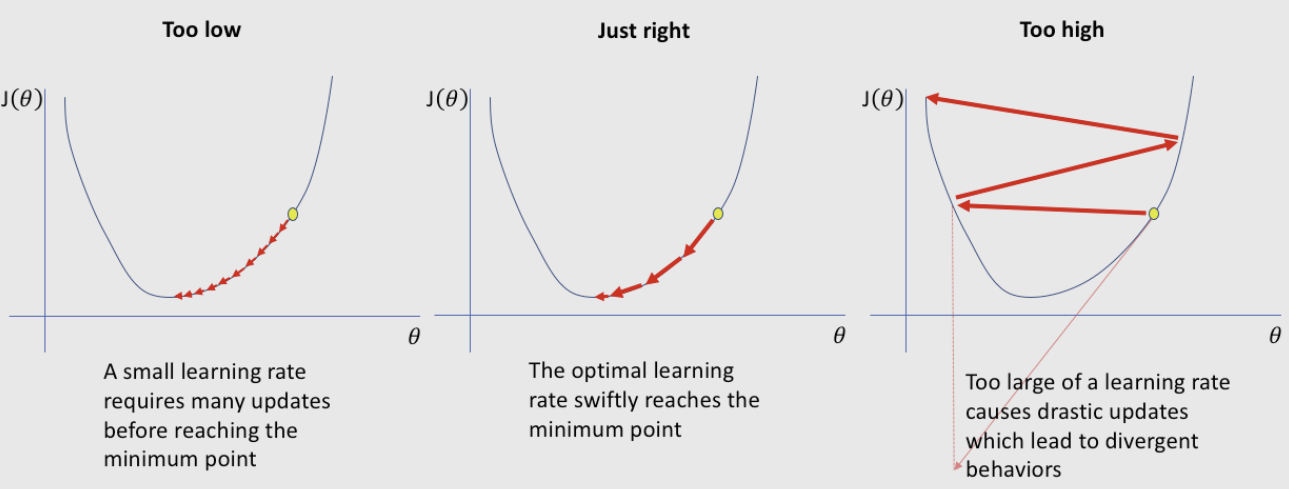

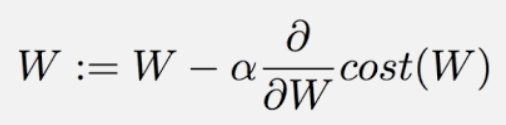